In [2]:
import wandb
import pandas as pd
import numpy as np
import os 

In [15]:
data_dump_path = r'/home/abishekthamma/PycharmProjects/masters_thesis/ss-llm/nanoGPT/results/rundata.xlsx'
run_details_sheet = "Run Details"
loss_sheet = "Loss"
blimp_sheet = "BLIMP"
rt_sheet = "Reading Time"

run_data = pd.read_excel(data_dump_path, sheet_name=run_details_sheet)
loss_data = pd.read_excel(data_dump_path, sheet_name=loss_sheet)
blimp_data = pd.read_excel(data_dump_path, sheet_name=blimp_sheet)
rt_data = pd.read_excel(data_dump_path, sheet_name=rt_sheet)
rt_subj_data = pd.read_excel(data_dump_path, sheet_name="Reading Time Subjectwise")
#Filter only for seed 1337 (defaul seed used before Multiseed experiments)
run_data_unfiltered = run_data
#run_data = run_data[run_data["seed"] == 1337]

run_data

,run_id,output_folder_name,n_layer,n_head,block_size,n_embd,batch_size,learning_rate,seed,masking,...,curriculum_type,dataset,log_exists,output_exists,ckpt_exists,sample_exists,blimp_exists,wandb_exists,reading_time_exists,model_surprisal_data_exists
0,5444724,out-babylm_full_bpe-4x4-nomask-5444724,4,4,128,256,32.0,0.0010,1337,False,...,NaN,babylm_full_bpe,True,True,True,False,True,True,True,True
1,5445338,out-babylm_wocdes_full_bpe-4x4-nomask-5445338,4,4,128,256,32.0,0.0005,1337,False,...,NaN,babylm_wocdes_full_bpe,True,True,True,False,True,True,True,True
2,5492054,out-babylm_full_bpe-8x8-nomask-5492054,8,8,512,512,32.0,0.0005,1337,False,...,NaN,babylm_full_bpe,True,True,True,True,True,True,True,True
3,5492134,out-babylm_full_bpe-6x6-nomask-5492134,6,6,256,384,32.0,0.0005,1337,False,...,NaN,babylm_full_bpe,True,True,True,True,True,True,True,True
4,5496426,out-babylm_full_bpe_8k-8x8-nomask-5496426,8,8,512,512,32.0,0.0005,1337,False,...,NaN,babylm_full_bpe_8k,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,7047464,out-babylm_full_bpe_8k-6x6-nomask-curr_log-704...,6,6,256,384,32.0,0.0005,46674,False,...,log,babylm_full_bpe_8k,True,True,True,True,True,True,True,True
134,7047466,out-babylm_full_bpe_8k-6x6-nomask-curr_log-704...,6,6,256,384,32.0,0.0005,6747,False,...,log,babylm_full_bpe_8k,True,True,True,True,True,True,True,True
135,7047467,out-babylm_full_bpe_8k-6x6-nomask-curr_log-704...,6,6,256,384,32.0,0.0005,869,False,...,log,babylm_full_bpe_8k,True,True,True,True,True,True,True,True
136,7047468,out-babylm_full_bpe_8k-6x6-nomask-curr_log-704...,6,6,256,384,32.0,0.0005,466,False,...,log,babylm_full_bpe_8k,True,True,True,True,True,True,True,True


In [12]:
def save_matplot_fig(fig, save_name, dpi=300):
    path = r'/home/abishekthamma/PycharmProjects/masters_thesis/ss-llm/nanoGPT/results/log_analyser' 
    path = os.path.join(path, save_name)
     
    #If extension is not provided, add it as pdf
    
    if not path.endswith(".pdf"):
        if not (path.endswith(".png") or path.endswith(".jpg") or path.endswith(".jpeg")):
            path = path + ".pdf"
            
        
    inp = input(f"Saving figure to {path}. Press Enter to continue, or type 'n' to cancel: ")
    if inp.lower() == 'n':
        print("Figure not saved")
        return
    
    
    fig.savefig(path, dpi=dpi, bbox_inches='tight')
    
    

In [5]:
#Some EDA
run_data[(run_data["curriculum_learning"]==False) & (run_data["dataset"] == "babylm_full_bpe_8k") & (run_data["echoic_memory"]==1) & (~run_data["mask_type"].isin(["exponential"])) & (run_data["n_layer"]==6)][["run_id", "output_folder_name", "mask_type", "mask_decay_rate" ]].sort_values(by=["mask_type", "mask_decay_rate"])

,run_id,output_folder_name,mask_type,mask_decay_rate
5,5496427,out-babylm_full_bpe_8k-6x6-nomask-5496427,Non,0.0
128,6892222,out-babylm_full_bpe_8k-6x6-nomask-6892222_s1337,Non,0.0
58,6810321,out-babylm_full_bpe_8k-6x6-mask_ee0p5_em01-681...,exponential_new,0.5
53,6810203,out-babylm_full_bpe_8k-6x6-mask_ee001_em01-681...,exponential_new,1.0
55,6810296,out-babylm_full_bpe_8k-6x6-mask_ee002_em01-681...,exponential_new,2.0
56,6810297,out-babylm_full_bpe_8k-6x6-mask_ee003_em01-681...,exponential_new,3.0
60,6810325,out-babylm_full_bpe_8k-6x6-mask_ee004_em01-681...,exponential_new,4.0
89,6849723,out-babylm_full_bpe_8k-6x6-mask_ee2000_em01-68...,exponential_new,2000.0
6,5734459,out-babylm_full_bpe_8k-6x6-mask_lin-5734459_s1337,linear,0.0
61,6810326,out-babylm_full_bpe_8k-6x6-mask_lin_em01-6810326,linear,0.0


In [6]:
relevant_run_ids  = {
    6892222 : "No Mask",
    6810326 : "Linear Decay",
    6810321 : "Exponential Decay 0.5",
    6810203: "Exponential Decay 1",
    6810296: "Exponential Decay 2",
    6810297: "Exponential Decay 3",
    6810325: "Exponential Decay 4",
    6810323: "Logarithmic Decay 0.5",
    6810205: "Logarithmic Decay 1",
    6810320: "Logarithmic Decay 2",
    6486044: "Sigmoid Decay 0.5",
    6486043: "Sigmoid Decay 1",
}



run_data_filtered = run_data[run_data["run_id"].isin(relevant_run_ids.keys())]
run_data_filtered["plot_label"] = run_data_filtered["run_id"].map(relevant_run_ids)
#Plot label order is order of the dictionary
plot_order = list(relevant_run_ids.values())
run_data_filtered["plot_label"] = pd.Categorical(run_data_filtered["plot_label"], categories=plot_order, ordered=True)
run_data_filtered = run_data_filtered.sort_values(by="plot_label")


run_data_filtered

/tmp/ipykernel_91757/3600488696.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_data_filtered["plot_label"] = run_data_filtered["run_id"].map(relevant_run_ids)
/tmp/ipykernel_91757/3600488696.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_data_filtered["plot_label"] = pd.Categorical(run_data_filtered["plot_label"], categories=plot_order, ordered=True)


,run_id,output_folder_name,n_layer,n_head,block_size,n_embd,batch_size,learning_rate,seed,masking,...,dataset,log_exists,output_exists,ckpt_exists,sample_exists,blimp_exists,wandb_exists,reading_time_exists,model_surprisal_data_exists,plot_label
128,6892222,out-babylm_full_bpe_8k-6x6-nomask-6892222_s1337,6,6,256,384,32.0,0.0005,1337,False,...,babylm_full_bpe_8k,True,True,True,True,True,True,True,True,No Mask
61,6810326,out-babylm_full_bpe_8k-6x6-mask_lin_em01-6810326,6,6,256,384,32.0,0.0005,1337,True,...,babylm_full_bpe_8k,True,True,True,True,True,True,True,True,Linear Decay
58,6810321,out-babylm_full_bpe_8k-6x6-mask_ee0p5_em01-681...,6,6,256,384,32.0,0.0005,1337,True,...,babylm_full_bpe_8k,True,True,True,True,True,True,True,True,Exponential Decay 0.5
53,6810203,out-babylm_full_bpe_8k-6x6-mask_ee001_em01-681...,6,6,256,384,32.0,0.0005,1337,True,...,babylm_full_bpe_8k,True,True,True,True,True,True,True,True,Exponential Decay 1
55,6810296,out-babylm_full_bpe_8k-6x6-mask_ee002_em01-681...,6,6,256,384,32.0,0.0005,1337,True,...,babylm_full_bpe_8k,True,True,True,True,True,True,True,True,Exponential Decay 2
56,6810297,out-babylm_full_bpe_8k-6x6-mask_ee003_em01-681...,6,6,256,384,32.0,0.0005,1337,True,...,babylm_full_bpe_8k,True,True,True,True,True,True,True,True,Exponential Decay 3
60,6810325,out-babylm_full_bpe_8k-6x6-mask_ee004_em01-681...,6,6,256,384,32.0,0.0005,1337,True,...,babylm_full_bpe_8k,True,True,True,True,True,True,True,True,Exponential Decay 4
59,6810323,out-babylm_full_bpe_8k-6x6-mask_log0p5_em01-68...,6,6,256,384,32.0,0.0005,1337,True,...,babylm_full_bpe_8k,True,True,True,True,True,True,True,True,Logarithmic Decay 0.5
54,6810205,out-babylm_full_bpe_8k-6x6-mask_log001_em01-68...,6,6,256,384,32.0,0.0005,1337,True,...,babylm_full_bpe_8k,True,True,True,True,True,True,True,True,Logarithmic Decay 1
57,6810320,out-babylm_full_bpe_8k-6x6-mask_log002_em01-68...,6,6,256,384,32.0,0.0005,1337,True,...,babylm_full_bpe_8k,True,True,True,True,True,True,True,True,Logarithmic Decay 2


In [7]:
run_data[(run_data["curriculum_learning"]==False) & (run_data["dataset"] == "babylm_full_bpe_8k") & (~run_data["mask_type"].isin(["exponential"])) & (run_data["n_layer"]==6) & (run_data["mask_type"] == "linear" )
][["run_id", "output_folder_name", "mask_type", "mask_decay_rate" ]].sort_values(by=["mask_type", "mask_decay_rate"]).merge(loss_data, on="run_id")

,run_id,output_folder_name,mask_type,mask_decay_rate,wandb_exists,train_loss,val_loss
0,5734459,out-babylm_full_bpe_8k-6x6-mask_lin-5734459_s1337,linear,0.0,True,2.887835,3.846241
1,6681938,out-babylm_full_bpe_8k-6x6-mask_lin_em05-6681938,linear,0.0,True,2.888227,3.842720
2,6681941,out-babylm_full_bpe_8k-6x6-mask_lin_em10-6681941,linear,0.0,True,2.888577,3.843202
3,6810326,out-babylm_full_bpe_8k-6x6-mask_lin_em01-6810326,linear,0.0,True,2.888309,3.843170


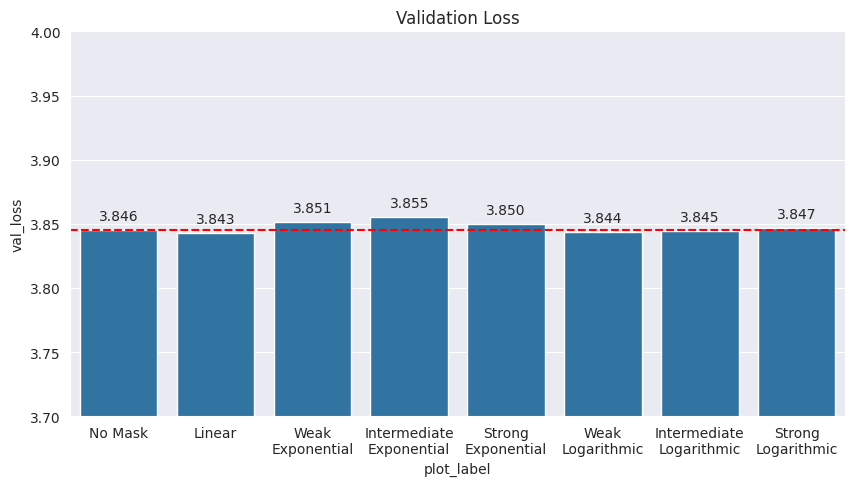

In [8]:
plot_loss = run_data_filtered.merge(loss_data, on="run_id")
plot_loss["plot_label"] = plot_loss.plot_label.apply(lambda x: x.rstrip("")).map({
    "No Mask": "No Mask",
    "Linear Decay": "Linear",
    "Exponential Decay 0.5": "Weak\nExponential",
    "Exponential Decay 1": "Intermediate\nExponential",
    "Exponential Decay 2": "Strong\nExponential",
    "Logarithmic Decay 0.5": "Weak\nLogarithmic",
    "Logarithmic Decay 1": "Intermediate\nLogarithmic",
    "Logarithmic Decay 2": "Strong\nLogarithmic",

})
plot_loss
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(data=plot_loss, x="plot_label", y="val_loss", ax=ax)
ax.set_title("Validation Loss")
#ax.xaxis.set_tick_params(rotation=90)
ax.set_ylim(3.7, 4)

#draw dotted line at no mask loss
ax.axhline(y=pd.Series(plot_loss[plot_loss["plot_label"] == "No Mask"]["val_loss"]).values[0], color='r', linestyle='--')

#Annotation with loss values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# sns.barplot(data=plot_loss, x="plot_label", y="train_loss", ax=ax[1])
# ax[1].set_title("Training Loss")
# plt.show()

/tmp/ipykernel_91757/247148563.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  plot_loss2["x_label"] = plot_loss2["mask_type"].replace({"linear": "Linear",


    run_id                                output_folder_name mask_type  \
0  5496427         out-babylm_full_bpe_8k-6x6-nomask-5496427       Non   
1  6892222   out-babylm_full_bpe_8k-6x6-nomask-6892222_s1337       Non   
2  6681938  out-babylm_full_bpe_8k-6x6-mask_lin_em05-6681938    linear   
3  6681941  out-babylm_full_bpe_8k-6x6-mask_lin_em10-6681941    linear   
4  6810326  out-babylm_full_bpe_8k-6x6-mask_lin_em01-6810326    linear   

   mask_decay_rate  echoic_memory  wandb_exists  train_loss  val_loss  \
0              0.0              1          True    2.898325  3.845494   
1              0.0              1          True    2.897251  3.845519   
2              0.0              5          True    2.888227  3.842720   
3              0.0             10          True    2.888577  3.843202   
4              0.0              1          True    2.888309  3.843170   

    x_label  
0  No Mask   
1  No Mask   
2   Linear   
3   Linear   
4   Linear   
     run_id                     

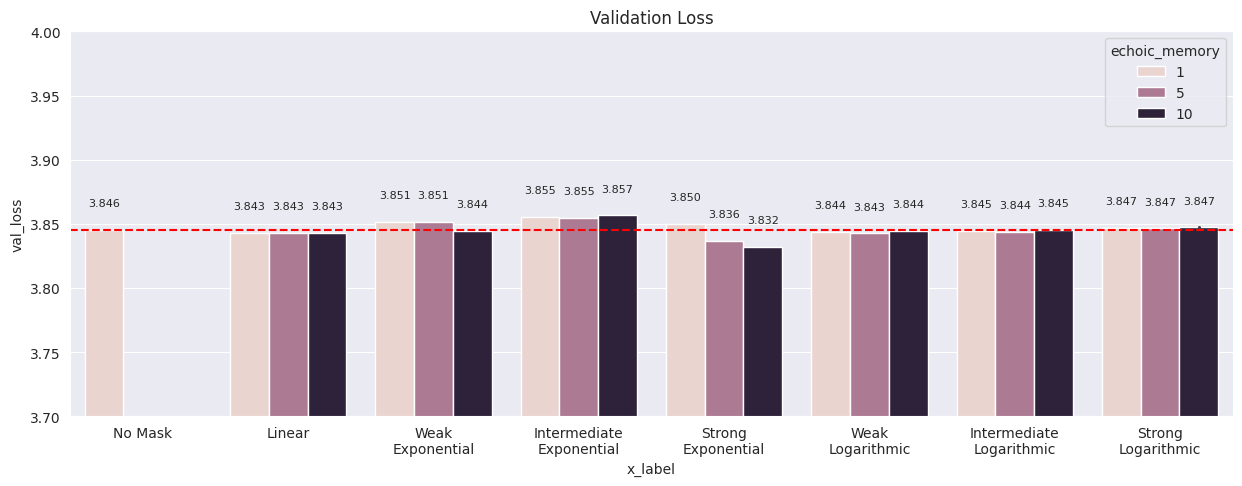

In [9]:
#Some EDA
plot_loss2 = run_data[(run_data["curriculum_learning"]==False) & (run_data["dataset"] == "babylm_full_bpe_8k") & (~run_data["mask_type"].isin(["exponential", "sigmoid"])) & (run_data["n_layer"]==6) & (run_data["mask_decay_rate"] != 2000)][["run_id", "output_folder_name", "mask_type", "mask_decay_rate", "echoic_memory" ]].assign(mask_type=lambda x: pd.Categorical(x["mask_type"], categories=["Non", "linear", "exponential_new", "logarithmic", "sigmoid"], ordered=True)).sort_values(by=["mask_type", "mask_decay_rate"])
#Filter out specific run ids because they are duplicates or not relevant - 5734459, 6617787 (Old Linear and Old Logarithmic)
plot_loss2 = plot_loss2[~plot_loss2["run_id"].isin([5734459, 6617787])]


plot_loss2 = plot_loss2.merge(loss_data, on="run_id")

#Convert string to %g for better display
plot_loss2["x_label"] = plot_loss2["mask_type"].replace({"linear": "Linear",
                                                         "logarithmic": "Logarithmic",
                                                         "Non": "No Mask",
                                                         "sigmoid": "Sigmoid",
                                                         "exponential_new": "Exponential",
                                                         }).astype(str) + " " + plot_loss2["mask_decay_rate"].astype(str).replace("\.0", "", regex=True).replace("0", "")
print(plot_loss2.head())
plot_loss2["x_label"] = (plot_loss2.x_label.apply(lambda x: x.rstrip("")).map({
    "No Mask ": "No Mask",
    "Linear ": "Linear",
    "Exponential 0.5": "Weak\nExponential",
    "Exponential 1": "Intermediate\nExponential",
    "Exponential 2": "Strong\nExponential",
    "Logarithmic 0.5": "Weak\nLogarithmic",
    "Logarithmic 1": "Intermediate\nLogarithmic",
    "Logarithmic 2": "Strong\nLogarithmic",

}))
#plot_loss2 = plot_loss.dropna()
print(plot_loss2)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.barplot(data=plot_loss2, x="x_label", y="val_loss", hue="echoic_memory", ax=ax)
# labels= []
# for label, df in plot_loss2.groupby("echoic_memory"):
#     ax.bar(df.index, df["val_loss"], label=label)
#     ax.set_xticks(df.index)
#     labels.append(label)
# ax.legend(labels)

ax.set_title("Validation Loss")
#ax.xaxis.set_tick_params(rotation=90)

ax.axhline(y=pd.Series(plot_loss2[plot_loss2["x_label"] == "No Mask"]['val_loss']).values[0], color='r', linestyle='--')

ax.set_ylim(3.7, 4)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()+0.01), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)





/tmp/ipykernel_91757/863925917.py:177: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  plot_loss2["x_label"] = plot_loss2["mask_type"].replace({"linear": "Linear",
/tmp/ipykernel_91757/863925917.py:203: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_loss2_a, x="x_label", y="val_loss", ax=ax[0], palette=["tab:blue", "tab:orange"])
/tmp/ipykernel_91757/863925917.py:214: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_loss2_b, x="x_label", y="val_loss", ax=ax[1], pal

    run_id                                output_folder_name mask_type  \
0  6892212     out-babylm_full_bpe_8k-6x6-nomask-6892212_s42       Non   
1  6892213   out-babylm_full_bpe_8k-6x6-nomask-6892213_s2347       Non   
2  6892214      out-babylm_full_bpe_8k-6x6-nomask-6892214_s9       Non   
3  6892216    out-babylm_full_bpe_8k-6x6-nomask-6892216_s616       Non   
4  6892217  out-babylm_full_bpe_8k-6x6-nomask-6892217_s46674       Non   

   mask_decay_rate  echoic_memory  wandb_exists  train_loss  val_loss  \
0              0.0              1          True    2.912897  3.851849   
1              0.0              1          True    2.902385  3.843445   
2              0.0              1          True    2.914923  3.852118   
3              0.0              1          True    2.907289  3.837300   
4              0.0              1          True    2.902256  3.845793   

    x_label  
0  No Mask   
1  No Mask   
2  No Mask   
3  No Mask   
4  No Mask   
[3.8 3.9 4.  4.1 4.2 4.3]
Echoic

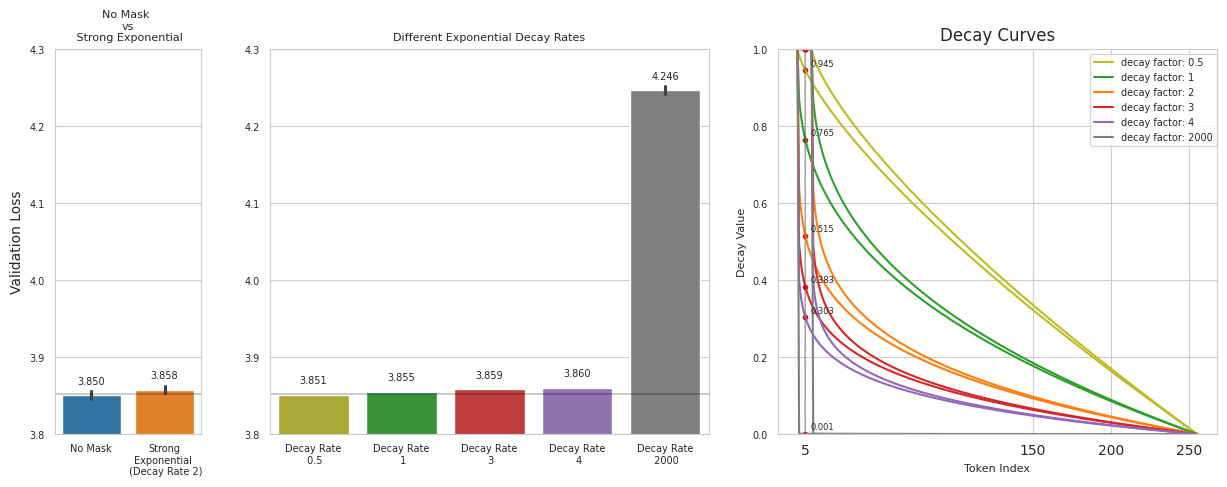

In [17]:
def ret_chart_3(fig, axr):
    
    import torch
    import matplotlib.pyplot as plt
    import numpy as np
    def get_decay_weight_matrix( n, decay_length, decay_factor=None, decay_type=None, decay_echoic_memory=1):
        
        """
        Get a decay weight matrix for a given context window size n.
        :param n: Context window size for the decay matrix
        :param decay_length: Actual length over which decay happens (usually is supposed to be equal to or greater than n) 
        :param decay_factor: Decay factor for the decay matrix, analogous to weight of the decay
        :param decay_type: Type of decay to apply to the matrix #linear, exponential, inverse_sigmoid, custom_logistic
        :param decay_echoic_memory: Echoic memory for the decay matrix, first n values where "effect of decay" is not applied, where memory is supposedly perfect
        :return: 
        """    
    
        if decay_type == 'linear':
            decay_length = decay_length - decay_echoic_memory+1
            decay_values = torch.linspace(1, 0, decay_length)
            decay_values = torch.cat((torch.ones(decay_echoic_memory-1), decay_values))
            decay_length = decay_length+decay_echoic_memory-1
            if decay_length != n:
                assert decay_length > n  #n is context window size and ideally we want decay length to be larger because we are going to cut it off
                decay_values = decay_values[:n] #Cut off the decay values to the context window size
    
        #elif decay_type == 'exponential':
        #    decay_values = torch.arange(n, 0, -1, dtype=float) ** decay_factor
        #    decay_values/=torch.max(decay_values)
        # elif decay_type == 'logarithmic':
        #     decay_values = torch.log(torch.arange(n, 0, -1) + 1)
        elif decay_type == 'exponential':
            decay_length = decay_length - decay_echoic_memory + 1
            nums = torch.linspace(0, 1, decay_length)
            decay_values = torch.exp(-nums * decay_factor)
            #print(decay_values, "\n \n \n ")   
            decay_values = torch.cat((torch.ones(decay_echoic_memory-1), decay_values))
            decay_length = decay_length+decay_echoic_memory-1
            if decay_length != n:
                assert decay_length > n
                decay_values = decay_values[:n]
    
        elif decay_type == "inverse_sigmoid":
            decay_length = decay_length - decay_echoic_memory + 1 
            nums = torch.linspace(10, -10, decay_length) #assuming hardcoded range between 10 and -10 for now
            decay_values = 1/(1+torch.exp(-decay_factor*nums))
            decay_values = torch.cat((torch.ones(decay_echoic_memory-1), decay_values))
            decay_length = decay_length+decay_echoic_memory-1
            #Uncomment below line if we want values to be scaled to 1-0 instead of close to 1 and 0 as sigmoid intends
            #decay_values = (decay_values - torch.min(decay_values)) / (torch.max(decay_values) - torch.min(decay_values))
    
            if decay_length != n:
                assert decay_length > n
                decay_values = decay_values[:n]
        
        elif decay_type == "logarithmic":
            decay_length = decay_length - decay_echoic_memory + 1
            nums = torch.linspace(0, 1, decay_length)   
            decay_values = 1-torch.pow(nums,np.e*decay_factor)
            decay_values = torch.cat((torch.ones(decay_echoic_memory-1), decay_values))
            decay_length = decay_length+decay_echoic_memory-1
            if decay_length != n:
                assert decay_length > n
                decay_values = decay_values[:n]
        
        elif decay_type == "exponential_2":
            decay_length = decay_length - decay_echoic_memory + 1
            nums = torch.linspace(0, 1, decay_length)
            decay_values = 1 - torch.pow(nums, 1/(np.e*decay_factor))
            decay_values = torch.cat((torch.ones(decay_echoic_memory-1), decay_values))
            decay_length = decay_length+decay_echoic_memory-1
            if decay_length != n:
                assert decay_length > n
                decay_values = decay_values[:n]
                
                
        elif decay_type == "custom_logistic":
            A = 0  # Lower asymptote
            K = 1  # Upper asymptote
            B = 0.8  # Growth rate
            Q = 125  # Related to value at x=0
            nu = 4  # Shape parameter
            M = 4  # Inflection point (time of max growth)
            
            decay_length = decay_length - decay_echoic_memory + 1
            x = torch.linspace(-10, 14.5, decay_length)
            decay_values = A + (K - A) / (1 + Q * torch.exp(-B * (x - M))) ** (1 / nu)
            decay_values = torch.flip(decay_values, [0])
            decay_values = torch.cat((torch.ones(decay_echoic_memory-1), decay_values))
            decay_length = decay_length+decay_echoic_memory-1
            if decay_length != n:
                assert decay_length > n
                decay_values = decay_values[:n]
    
        # Apply the decay values to the lower triangle
    
        indices = torch.arange(n)[:, None] - torch.arange(n)
        lower_triangle = torch.tril(decay_values[indices])
        lower_triangle = lower_triangle.float()
    
        return lower_triangle
    
    n = 256
    decay_length = 256
    decay_factor = 1
    decay_type = "logarithmic"
    decay_echoic_memory = 5
    
    decay_matrix = get_decay_weight_matrix(n, decay_length, decay_factor=decay_factor, decay_type=decay_type, decay_echoic_memory=decay_echoic_memory)
    #print(decay_matrix[-1])
    
    for i in [1, 10]:
        print(f"Echoic memory: {i}")
        #fig, axr = plt.subplots(1, 1, figsize=(10, 10))
        for dt in ['exponential_2']:
            print(f"Decay type: {dt}")
            for j in [0.5, 1, 2, 3, 4, 2000]:
                color_mapper = {
                    0.5: 'tab:olive',
                    1: 'tab:green',
                    2: 'tab:orange',
                    3: 'tab:red',
                    4: 'tab:purple',
                    2000: 'tab:gray'
                }
                print(f"Decay factor: {j}")
                d_vals = get_decay_weight_matrix(256, 256, decay_factor=j, decay_type=dt, decay_echoic_memory=i)
                plot_vals = d_vals[-1]
                #Flip the values to get the correct order
                plot_vals = plot_vals.flip([0])
                print(plot_vals[:15])
                #lt.plot(plot_vals, label=f"Echoic memory: {i}  decay factor: {j}  decay type: {dt}")
                #ax[0].plot(plot_vals, label=f"Decay factor: {j}  decay type: {dt}")
    
                #Annotate 5th value in each curve of the plot using arrow 
                axr.annotate(f'{plot_vals[5]:.3f}', 
                            (8, plot_vals[5]+0.01), 
                            #xytext=(5, plot_vals[5]+0.1),
                            # bbox=dict(boxstyle="round,pad=0.3", 
                            #           fc="white", ec="black", 
                            #           lw=0.72),
                            # #arrowprops=dict(arrowstyle='->',
                            #                connectionstyle="angle,angleA=0,angleB=90,rad=10"),
                            
                            fontsize=6)
                axr.plot(5, plot_vals[5], 'r.')
                axr.axvline(x=5, color='black', linestyle='--', linewidth=0.05, alpha=0.5)
                
                axr.plot(plot_vals, label=f"Decay factor: {j}", color=color_mapper[j])
        # ax.plot(5,0, 'r.')
        # ax.annotate(5, (5, -0.05))
    
        #ax.set_title(f"Echoic memory: {i}")
        axr.set_xlabel('Index')
        axr.set_ylabel('Decay Value')
        print(axr.get_xticks().tolist())
        axr.set_xticks(axr.get_xticks().tolist()[2:-1]+[5])
        axr.set_ylim(0, 1)
        
        #ax.legend(bbox_to_anchor=(0.5, 1), loc='upper left', )
        print(axr.get_legend_handles_labels())
        axr.legend(axr.get_legend_handles_labels()[0], ["decay factor: 0.5", "decay factor: 1", "decay factor: 2", "decay factor: 3", "decay factor: 4", "decay factor: 2000"], bbox_to_anchor=(0.7, 1), loc='upper left', fontsize=7 )
        #ax.legend(["decay factor: 0.5", "decay factor: 1", "decay factor: 2", "decay factor: 3", "decay factor: 4"],
        #          bbox_to_anchor=(0.5, 1), loc='upper left', )
        #import seaborn as sns
        #sns.set(style='ticks')
        #sns.despine(ax=ax, offset=0)
        
    return axr

plot_loss2 = run_data[(run_data["curriculum_learning"]==False) & (run_data["dataset"] == "babylm_full_bpe_8k") & (run_data["echoic_memory"]==1) &
                      (~run_data["mask_type"].isin(["exponential", "sigmoid"])) & (run_data["n_layer"]==6)][["run_id", "output_folder_name", "mask_type", "mask_decay_rate", "echoic_memory" ]].assign(mask_type=lambda x: pd.Categorical(x["mask_type"], categories=["Non", "linear", "exponential_new", "logarithmic", "sigmoid"], ordered=True)).sort_values(by=["mask_type", "mask_decay_rate"])
plot_loss2 = plot_loss2[~plot_loss2["run_id"].isin([5734459, 5496427, 6617787])]
plot_loss2 = plot_loss2.merge(loss_data, on="run_id")

#Convert string to %g for better display
plot_loss2["x_label"] = plot_loss2["mask_type"].replace({"linear": "Linear",
                                                         "logarithmic": "Logarithmic",
                                                         "Non": "No Mask",
                                                         "sigmoid": "Sigmoid",
                                                         "exponential_new": "Exponential",
                                                         }).astype(str) + " " + plot_loss2["mask_decay_rate"].astype(str).replace("\.0", "", regex=True).replace("0", "")
plot_loss2_b = plot_loss2[(plot_loss2["mask_type"] == "exponential_new") & (plot_loss2["mask_decay_rate"] != 2)]
print(plot_loss2.head())
plot_loss2["x_label"] = (plot_loss2.x_label.apply(lambda x: x.rstrip("")).map({
    "No Mask ": "No Mask",
    "Linear ": "Linear",
    "Exponential 0.5": "Weak\nExponential",
    "Exponential 1": "Intermediate\nExponential",
    "Exponential 2": "Strong\nExponential \n (Decay Rate 2)",
    "Logarithmic 0.5": "Weak\nLogarithmic",
    "Logarithmic 1": "Intermediate\nLogarithmic",
    "Logarithmic 2": "Strong\nLogarithmic",
}))
plot_loss2_a = plot_loss2[plot_loss2["x_label"].isin(["No Mask", "Strong\nExponential \n (Decay Rate 2)"])]


plot_loss2_a = plot_loss2[plot_loss2["x_label"].isin(["No Mask", "Strong\nExponential \n (Decay Rate 2)"])]
#plot_loss2_b = plot_loss2[(plot_loss2["mask_type"] == "exponential_new") & (plot_loss2["mask_decay_rate"] != 2)]

fig, ax = plt.subplots(1, 3, figsize=(15, 5), width_ratios=[1, 3,3])
#sns.stripplot(data=plot_loss2_a, x="x_label", y="val_loss", ax=ax[0])
sns.barplot(data=plot_loss2_a, x="x_label", y="val_loss", ax=ax[0], palette=["tab:blue", "tab:orange"])
ax[0].set_ylim(3.8, 4.3)
ax[1].set_ylim(3.8, 4.3)
color_mapper = {
                    0.5: 'tab:olive',
                    1: 'tab:green',
                    2: 'tab:orange',
                    3: 'tab:red',
                    4: 'tab:purple',
                    2000: 'tab:gray'
                }
sns.barplot(data=plot_loss2_b, x="x_label", y="val_loss", ax=ax[1], palette=[color_mapper[0.5], color_mapper[1], color_mapper[3], color_mapper[4], color_mapper[2000]])



ax[0].set_xticklabels(fontsize=7, labels = ax[0].get_xticklabels())
ax[1].set_xticklabels([x.get_text().replace("Exponential", "Decay Rate\n") for x in ax[1].get_xticklabels()], fontsize=7)

ax[0].axhline(y=pd.Series(plot_loss2_a[plot_loss2_a["x_label"] == "No Mask"]['val_loss']).values[0], color='black', linestyle='-', linewidth=0.3)
ax[1].axhline(y=pd.Series(plot_loss2_a[plot_loss2_a["x_label"] == "No Mask"]['val_loss']).values[0], color='black', linestyle='-', linewidth=0.3)
# labels= []

ax[0].set_title("No Mask \nvs\n Strong Exponential", fontsize=8)
ax[1].set_title("Different Exponential Decay Rates", fontsize=8)

ax[0].set_ylabel("Validation Loss")
ax[1].set_ylabel("")

ax[0].set_xlabel("")
ax[1].set_xlabel("")

print(ax[0].get_yticks())
ax[0].yaxis.set_tick_params(labelsize=7)
ax[1].yaxis.set_tick_params(labelsize=7)
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7)
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7)

ax[2] = ret_chart_3(fig, ax[2])
ax[2].set_title("Decay Curves")
ax[2].set_ylabel("Decay Value", fontsize=8)
ax[2].set_xlabel("Token Index", fontsize=8)
ax[2].yaxis.set_tick_params(labelsize=7)

#save_matplot_fig(fig, "val_error_mask_no_mask_fig1_hq_v3", dpi=2000)
#save_matplot_fig(fig, "val_error_mask_no_mask_fig1_hq_v4.pdf", dpi=2000)

In [30]:
run_data[(run_data["curriculum_learning"]==True) & (run_data["dataset"] == "babylm_full_bpe_8k") & (run_data["n_layer"]==6) ] #[["run_id", "output_folder_name", "mask_type", "mask_decay_rate" ]].sort_values(by=["mask_type", "mask_decay_rate"]).merge(loss_data, on="run_id")

,run_id,output_folder_name,n_layer,n_head,block_size,n_embd,batch_size,learning_rate,seed,masking,...,curriculum_type,dataset,log_exists,output_exists,ckpt_exists,sample_exists,blimp_exists,wandb_exists,reading_time_exists,model_surprisal_data_exists
23,6603578,out-babylm_full_bpe_8k-6x6-nomask-curr_log-660...,6,6,256,384,32.0,0.0005,1337,False,...,log,babylm_full_bpe_8k,True,True,True,True,True,True,True,True
24,6603579,out-babylm_full_bpe_8k-6x6-nomask-curr_lin-660...,6,6,256,384,32.0,0.0005,1337,False,...,lin,babylm_full_bpe_8k,True,True,True,True,True,True,True,True
25,6603580,out-babylm_full_bpe_8k-6x6-nomask-curr_lin-660...,6,6,256,384,32.0,0.0005,1337,False,...,lin,babylm_full_bpe_8k,True,True,True,True,True,True,True,True
28,6620547,out-babylm_full_bpe_8k-6x6-nomask-curr_lin-662...,6,6,256,384,32.0,0.0005,1337,False,...,lin,babylm_full_bpe_8k,True,True,True,True,True,True,True,True
29,6620548,out-babylm_full_bpe_8k-6x6-nomask-curr_lin-662...,6,6,256,384,32.0,0.0005,1337,False,...,lin,babylm_full_bpe_8k,True,True,True,True,True,True,True,True
30,6621801,out-babylm_full_bpe_8k-6x6-nomask-curr_log-662...,6,6,256,384,32.0,0.0005,1337,False,...,log,babylm_full_bpe_8k,True,True,True,True,True,True,True,True
50,6689751,out-babylm_full_bpe_8k-6x6-nomask-curr_log-668...,6,6,256,384,32.0,0.0005,1337,False,...,log,babylm_full_bpe_8k,True,True,True,True,True,True,True,True
51,6689752,out-babylm_full_bpe_8k-6x6-nomask-curr_log-668...,6,6,256,384,32.0,0.0005,1337,False,...,log,babylm_full_bpe_8k,True,True,True,True,True,True,True,True
52,6689753,out-babylm_full_bpe_8k-6x6-nomask-curr_log-668...,6,6,256,384,32.0,0.0005,1337,False,...,log,babylm_full_bpe_8k,True,True,True,True,True,True,True,True
129,7047459,out-babylm_full_bpe_8k-6x6-nomask-curr_log-704...,6,6,256,384,32.0,0.0005,42,False,...,log,babylm_full_bpe_8k,True,True,True,True,True,True,True,True


Lowest validation loss seed:  6747
Number of rows before filtering:  3280
Number of rows after filtering:  328


/tmp/ipykernel_91757/2925252945.py:215: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]][plotcolname].values[0] - x[x['condition']==col_names[col_id2]][plotcolname].values[0])
/tmp/ipykernel_91757/2925252945.py:267: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(fontsize=6, labels = ax[0].get_xticklabels())
/tmp/ipykernel_91757/2925252945.py:215: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the groupi

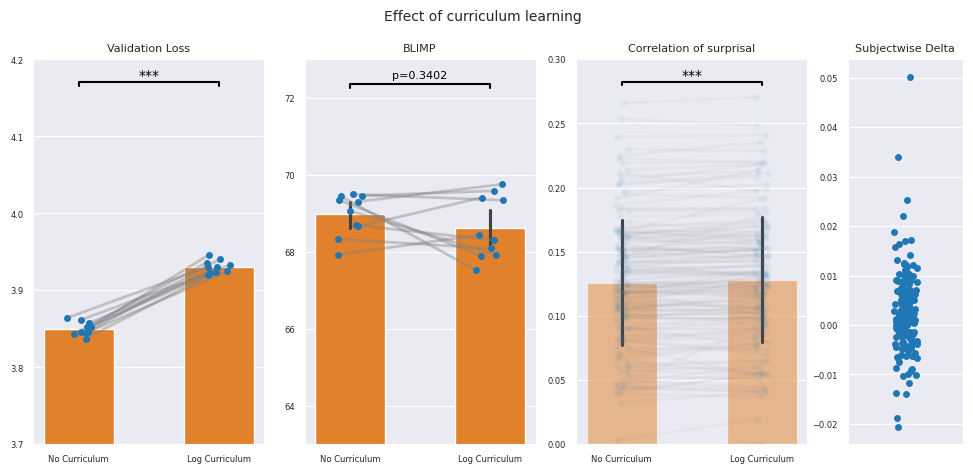

In [16]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy

def fmt_boot_pval(pval,n_boots=10e4,scientific=False) -> str:
    """convertr bootstrap pvalues to expression that takes into account precision
    (e.g. p=0 will become p < x, with x being determined by number of bootstraps)"""
    if scientific:
        p_str= f'p={pval}' if pval>0 else f'p < {round(1/float(n_boots),int(np.log10(n_boots)+1))}'
    else:
        if pval>0:p_str=f'p={pval}'
        else:p_str='p < {atleast:.{decim}f}'.format(atleast=1/float(n_boots),decim=int(np.log10(n_boots)))
    return(p_str)

def bootstrap_t_onesample(samps_in,pop_mean=0,tail='2s',n_boots=10e4,seed=123):
    """one-sample (paired) bootstrap t-test; returns p-value only

    in:
    - samps: nd.array, shape(n_samples)
        datapoints
    - pop_mean: float, Default=0
        mean to test against
    - tail: str, default: '2s'
        options: '2s','l','r' (for two-tailed,left or right-tailed)
    - n_boots: int; default=10e3
        number of bootstraps (determines precision)

    out:
    -pval: float
        fraction of instances where simulated null distribution returns
        test statistic that is at least as extreme as emprical test stat.
    see also:
    - fmt_boot_pval, function to format the pvalues, changes p=0 into P < (1/n_boots) statement
    dependencies: bootstrap from astropy
    """
    if seed is not None:
      np.random.seed(seed)
    # test stat
    t_func=lambda x,dim:(x.mean(dim)-pop_mean)/(x.std(dim)/np.sqrt(x.shape[dim]))
    # make null distribution
    null_boot_test=t_func(bootstrap(samps_in-samps_in.mean(0)+pop_mean,bootnum=int(n_boots)),1)
    emp_test=t_func(samps_in,0)
    # return p-value as probability of obtaining a test stat at least as extreme under the null
    if tail in ['2s','two','both']:
        left_pval=np.mean(null_boot_test<emp_test)
        right_pval=np.mean(null_boot_test>emp_test)
        return(2*min(left_pval,right_pval))
    elif tail.lower() in ['l','left']:
        return(np.mean(null_boot_test<emp_test))
    elif tail.lower() in ['r','right']:
        return(np.mean(null_boot_test>emp_test))
    else:
        raise ValueError('tail not recognised!')

def bootstrap_analysis(data, pop_mean=0, tail='2s', n_boots=10000, seed=123):
    """
    Perform bootstrap analysis including one-sample t-test and compute 95% CI for the mean.

    Parameters:
    - data (array-like): Sample data.
    - pop_mean (float): Mean to test against.
    - tail (str): Type of the test ('2s' for two-tailed, 'l' for left-tailed, 'r' for right-tailed).
    - n_boots (int): Number of bootstrap samples.
    - seed (int): Seed for the random number generator.

    Returns:
    - dict: Contains the mean, 95% CI for the mean, and formatted p-value.
    """
    if seed is not None:
      np.random.seed(seed)

    # Compute the p-value using the provided function
    p_value = bootstrap_t_onesample(data, pop_mean, tail, n_boots, seed)

    # Format the p-value
    formatted_p_value = fmt_boot_pval(p_value, n_boots)

    # Calculate the sample mean
    sample_mean = np.mean(data)

    # Generate bootstrap samples for the CI of the mean
    bootstrap_samples = bootstrap(data, bootnum=n_boots, bootfunc=np.mean)
    ci_lower, ci_upper = np.percentile(bootstrap_samples, [2.5, 97.5])

    # Compile results
    results = {
        'mean                    ': sample_mean,
        '95%_CI around mean      ': (ci_lower, ci_upper),
        'bootstrap-t-test p_value': formatted_p_value
    }

    return results

def bootstrap(data, bootnum=1000, samples=None, bootfunc=None, seed=False):
    """Performs bootstrap resampling on numpy arrays. (FUNCTION FROM ASTROPY)

    Bootstrap resampling is used to understand confidence intervals of sample
    estimates. This function returns versions of the dataset resampled with
    replacement ("case bootstrapping"). These can all be run through a function
    or statistic to produce a distribution of values which can then be used to
    find the confidence intervals.

    Parameters
    ----------
    data : numpy.ndarray
        N-D array. The bootstrap resampling will be performed on the first
        index, so the first index should access the relevant information
        to be bootstrapped.
    bootnum : int, optional
        Number of bootstrap resamples
    samples : int, optional
        Number of samples in each resample. The default `None` sets samples to
        the number of datapoints
    bootfunc : function, optional
        Function to reduce the resampled data. Each bootstrap resample will
        be put through this function and the results returned. If `None`, the
        bootstrapped data will be returned

    Returns
    -------
    boot : numpy.ndarray

        If bootfunc is None, then each row is a bootstrap resample of the data.
        If bootfunc is specified, then the columns will correspond to the
        outputs of bootfunc.

    """
    if seed != False:
        np.random.seed(seed)

    if samples is None:
        samples = data.shape[0]

    # make sure the input is sane
    if samples < 1 or bootnum < 1:
        raise ValueError("neither 'samples' nor 'bootnum' can be less than 1.")

    if bootfunc is None:
        resultdims = (bootnum,) + (samples,) + data.shape[1:]
    else:
        # test number of outputs from bootfunc, avoid single outputs which are
        # array-like
        try:
            resultdims = (bootnum, len(bootfunc(data)))
        except TypeError:
            resultdims = (bootnum,)

    # create empty boot array
    boot = np.empty(resultdims)

    for i in range(bootnum):
        bootarr = np.random.randint(low=0, high=data.shape[0], size=samples)

#         if seed != False: print(bootarr)
        if bootfunc is None:
            boot[i] = data[bootarr]
        else:
            boot[i] = bootfunc(data[bootarr])

    return boot

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

def get_asterisk_map(pval):
    pval_c = float(pval.split('=')[1]) if 'p=' in pval else float(pval.split('<')[1])
    if pval_c < 0.001:
        return '***'
    elif pval_c < 0.01:
        return '**'
    elif pval_c < 0.05:
        return '*'
    else:
        return pval

def annotate_plot(ax, x1, x2, y, h, asterisk):
    #Ax = ax object
    #x1, x2 = x-coordinates of the bars, give absolute bar id location 0 to n_bar-1
    #y = y-coordinate of the bar, actual value in y axis where you want bar to be placed
    #h = height of the bar
    #asterisk = string to be placed on top of the bar, *,**,***, etc.
    
    if asterisk == '':
        return
    
    #Use annotate pairs to add bars on top of specific columns
    ax = plt.gca() if ax is None else ax
    
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    
    if asterisk in ['*', '**', '***']:
        ax.text((x1+x2)*.5, y+h, asterisk, ha='center', va='bottom', color='black')
    else:
        ax.text((x1+x2)*.5, y+h*2, asterisk, ha='center', va='bottom', color='black', fontsize=8)


def annotate_given_colid(ax, col_id1, col_id2, plot_data, y, h, plotcolname):
    
    col_names = [tick.get_text() for tick in ax.get_xticklabels()]
    col_names = {i: col_name for i, col_name in enumerate(col_names)}
    #print(col_names)
    #Using the column names, get the data for each condition #Just do for 0,1 for now
    
    stats_test_subset = plot_data[plot_data["condition"].isin([col_names[col_id1], col_names[col_id2]])]
    #Get pairwise differences
    pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]][plotcolname].values[0] - x[x['condition']==col_names[col_id2]][plotcolname].values[0])
    
    # perform bootstrap-t-test analysis on pairwise values (https://open.lnu.se/index.php/metapsychology/article/view/2058)
    res = bootstrap_analysis(pairwise_diff.values,)#alternatively, do: tail='r' to test for delta>0 (one-sided)
    #print(res)
    #Use results to annotate the plot
    annotate_plot(ax, col_id1, col_id2, y, h, get_asterisk_map(res['bootstrap-t-test p_value']))
    return res


curriculum_relevant_ids = {
6892222:"No Mask",
6689752:"Log Curriculum",
}
#Filter for curriculum true and babylm_full_bpe_8k and n_layer 6
#Or Curriculum False and babylm_full_bpe_8k and n_layer 6 and mask_type = Non, and echoic_memory = 1
curriculum_run_data = run_data[((run_data["curriculum_learning"]==True) & (run_data["dataset"] == "babylm_full_bpe_8k") & (run_data["n_layer"]==6)& (run_data["curriculum_type"] == "log") ) 
                               | ((run_data["curriculum_learning"]==False) & (run_data["dataset"] == "babylm_full_bpe_8k") & (run_data["n_layer"]==6) & (run_data["mask_type"] == "Non") & (run_data["echoic_memory"]==1))]

#If seed is 1337, then filter for only relevant run ids, else filter for all 
curriculum_run_data = curriculum_run_data[curriculum_run_data.apply(lambda x: x["run_id"] in curriculum_relevant_ids.keys() if x["seed"] == 1337 else True, axis=1)]   
curriculum_run_data["condition"] = curriculum_run_data["output_folder_name"].apply(lambda x: "Log Curriculum" if "curr" in x else "No Curriculum")
curriculum_run_data["condition"] = pd.Categorical(curriculum_run_data["condition"], categories=["No Curriculum", "Log Curriculum"], ordered=True)
curriculum_run_data = curriculum_run_data.sort_values(by="condition")
#Plot label order is order of the dictionary1
curriculum_run_data = curriculum_run_data.merge(loss_data, on="run_id")
#curriculum_run_data = curriculum_run_data.merge(rt_data, on="run_id")
curriculum_run_data = curriculum_run_data.merge(blimp_data, on="run_id")
#print(curriculum_run_data.columns)
lowest_cur_val_loss_seed = run_data[((run_data["curriculum_learning"]==True) & (run_data["dataset"] == "babylm_full_bpe_8k") & (run_data["n_layer"]==6)& (run_data["curriculum_type"] == "log") )].merge(loss_data, on="run_id").sort_values(by="val_loss").head(1)["seed"].values[0]
print("Lowest validation loss seed: ", lowest_cur_val_loss_seed)

curriculum_run_data_rt = curriculum_run_data[["seed", "condition", "output_folder_name", "run_id"]].join(rt_subj_data[["run_id", "subject_id", "corr_surprisal"]].set_index("run_id"), on="run_id")
#Number of rows
print("Number of rows before filtering: ", curriculum_run_data_rt.shape[0])

#Filter for only the lowest validation loss seed
curriculum_run_data_rt = curriculum_run_data_rt[curriculum_run_data_rt["seed"] == lowest_cur_val_loss_seed]
print("Number of rows after filtering: ", curriculum_run_data_rt.shape[0])


fig, ax = plt.subplots(1, 4, figsize=(12, 5), width_ratios=[2,2,2,1])
fig.suptitle("Effect of curriculum learning", fontsize=10)
sns.stripplot(data=curriculum_run_data, x="condition", y="val_loss", ax=ax[0] )
sns.barplot(data=curriculum_run_data, x="condition", y="val_loss", ax=ax[0], width=0.5, color='tab:orange', errorbar=None)
connect_dots(ax[0])
ax[0].set_title("Validation Loss", fontsize=8)
ax[0].set_ylim(3.7, 4.2)
res = annotate_given_colid(ax[0], 0, 1, curriculum_run_data, 4.165, 0.005, "val_loss")
ax[0].yaxis.set_tick_params(labelsize=6)
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].set_xticklabels(fontsize=6, labels = ax[0].get_xticklabels())
#ax.xaxis.set_tick_params(rotation=90)

sns.stripplot(data=curriculum_run_data, x="condition", y="blimp_avg", ax=ax[1])
sns.barplot(data=curriculum_run_data, x="condition", y="blimp_avg", ax=ax[1], width=0.5, color='tab:orange')
connect_dots(ax[1])
ax[1].set_ylim(63,73)
ax[1].set_title("BLIMP", fontsize=8)
res1 = annotate_given_colid(ax[1], 0, 1, curriculum_run_data, 72.25, 0.1, "blimp_avg")
ax[1].yaxis.set_tick_params(labelsize=6)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_xticklabels(fontsize=6, labels = ax[0].get_xticklabels())
#sns.stripplot(data=curriculum_run_data, x="condition", y="corr_surprisal", ax=ax[2])
#connect_dots(ax[2])
#

sns.stripplot(data=curriculum_run_data_rt, x="condition", y="corr_surprisal", dodge=True, alpha=.05, jitter=0.05, ax=ax[2])

sns.barplot(data=curriculum_run_data_rt, x="condition", y="corr_surprisal", dodge=True, alpha=.5, ax=ax[2], errorbar="sd", width=0.5, color='tab:orange')

connect_dots(ax[2], alpha=.05)
ax[2].set_title("Correlation of surprisal", fontsize=8)
ax[2].set_ylim(0,0.3) 
res2 = annotate_given_colid(ax[2], 0, 1, curriculum_run_data_rt, 0.28, 0.002, "corr_surprisal")
ax[2].yaxis.set_tick_params(labelsize=6)
ax[2].set_ylabel("")
ax[2].set_xlabel("")
ax[2].set_xticklabels(fontsize=6, labels = ax[0].get_xticklabels())



curriculum_run_data_rt_delta = curriculum_run_data_rt[["condition","subject_id", "corr_surprisal"]].pivot(index="subject_id", columns="condition", values="corr_surprisal")
curriculum_run_data_rt_delta["delta"] = curriculum_run_data_rt_delta["Log Curriculum"] - curriculum_run_data_rt_delta["No Curriculum"]
sns.stripplot(data=curriculum_run_data_rt_delta, y="delta", ax=ax[3], color='tab:blue')
ax[3].set_title("Subjectwise Delta", fontsize=8)
ax[3].yaxis.set_tick_params(labelsize=6)
ax[3].set_ylabel("")
ax[3].set_xlabel("")
#ax[3 ].set_xticklabels(fontsize=6, labels = ax[0].get_xticklabels())
#curriculum_run_data.sort_values(by="seed")

save_matplot_fig(fig, "curriculum_effect_fig1_mq_v3.png", dpi=1000)
save_matplot_fig(fig, "curriculum_effect_fig1_hq_v3", dpi=3000)

In [59]:
rt_subj_data



,subject_id,data_points,mse_surprisal,rmse_surprisal,r2_surprisal,explained_variance,corr_surprisal,run_id
0,A117RW2F1MNBQ8,5198,11777.330893,102.849329,-1.380647,0.004710,0.147227,5734459
1,A11AUVZ4MCA7VU,10224,30296.185302,173.348525,0.018231,0.023230,0.155763,5734459
2,A11GA4B4SEYK44,4211,11209.816511,97.491961,-0.065658,0.026805,0.168679,5734459
3,A11KMPAZSE5Q0Q,5199,3954.970703,62.090493,-0.043140,0.002080,0.057569,5734459
4,A127R5QI5OGBIK,5194,18325.622094,132.878420,-0.737667,0.017471,0.133256,5734459
...,...,...,...,...,...,...,...,...
22791,ASOBUAZ0IQYSJ,4115,26560.481791,159.263542,-0.023978,0.028112,0.178600,7047469
22792,AVG2BI8CS5YKX,5033,15847.178783,124.120548,-0.325812,0.015473,0.131398,7047469
22793,AWMGC78CSF6YL,3958,18050.789682,131.390500,0.012649,0.024863,0.164927,7047469
22794,AWZ3AH7JH0DRO,5033,34795.033726,180.727784,-0.091599,0.014132,0.124080,7047469


In [70]:
#ID Curriculum with lowest validation loss



6747